# Quantum Signal Processing

In [236]:
import numpy as np
from scipy.linalg import expm, sinm, cosm
import matplotlib.pyplot as plt

In [237]:
X_gate = np.array([[0, 1], [1, 0]], dtype = 'complex_')
Y_gate = np.array([[0, -1j], [1j, 0]], dtype = 'complex_')
Z_gate = np.array([[1, 0], [0, -1]], dtype = 'complex_')

def R_x(theta):
    return np.array([[np.cos(theta/2), -1j*np.sin(theta/2)], [-1j*np.sin(theta/2), np.cos(theta/2)]], dtype = 'complex_')

def R_y(theta):
    return np.array([[np.cos(theta/2), -1j*np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]], dtype = 'complex_')

def R_z(theta):
    return np.array([[np.exp(-1j*theta/2), 0], [0, np.exp(1j*theta/2)]], dtype = 'complex_')


In [238]:
def W(a):
    '''
    signal rotation operator
    '''
    return np.array([[a, 1j*np.sqrt(1-np.square(a)+0j)], [1j*np.sqrt(1-np.square(a)+0j), a]], dtype = 'complex_')

$$
W(a) = 
\begin{bmatrix}
a & i\sqrt{1-a^2} \\
i\sqrt{1-a^2} & a
\end{bmatrix}
$$

In [239]:
def S(phi):
    '''
    signal processing operator
    '''
    return expm(1j*phi*Z_gate)

$$ S(\phi) = e^{i \phi Z} $$

In [240]:
def QSP(phi_vec, a):
    '''
    input: vector of phis, a
    Performs the quantum signal processing 
    '''
    result = S(phi_vec[0])
    for k in range(1, len(phi_vec)):
        result = result @ (W(a) @ S(phi_vec[k]))
    return result

$$
U_{\vec{\phi}} = e^{i \phi_0 Z} \prod_{k=1}^d W(a) e^{i \phi_k Z}
=
\begin{bmatrix}
P(a) & i Q(a) \sqrt{1-a^1} \\
i Q^{*}(a) \sqrt{1-a^2} & P^{*}(a)
\end{bmatrix}
$$

## Trivial Example
$ \vec{\phi} = (0,0) $

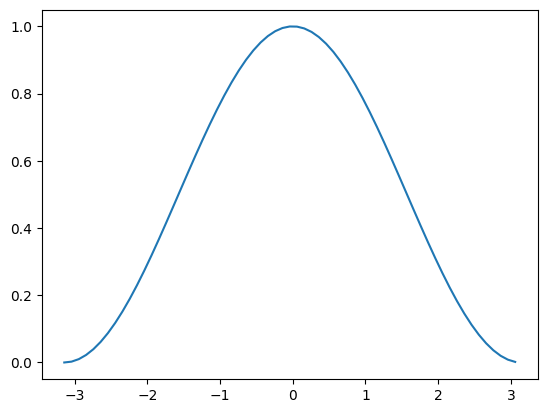

In [241]:
phi_vec_triv = [0, 0]

theta_vec_triv = np.arange(start=-np.pi, stop=np.pi, step=0.1)
a_vec_triv = [np.cos(-1/2*theta) for theta in theta_vec_triv]

transformation = [np.square(np.abs((QSP(phi_vec_triv, a)[0][0]))) for a in a_vec_triv]

plt.plot(theta_vec_triv, transformation)
plt.show()

## Example BB1
$ \vec{\phi} = (\pi/2, -\eta, 2\eta, 0, -2\eta, \eta) $ with $ \eta = \frac{1}{2} \cos^{-1}(-1/4) $

In [242]:
eta = 1/2 * np.arccos(-1/4)
phi_vec_bb1 = [np.pi/2, -eta, 2*eta, 0, -2*eta, eta]

$ \theta = -2 \cos^{-1}(a) \implies a = \cos(-\frac{1}{2} \theta) $

[1.4060247962454925e-32, 0.009332160519240016, 0.03682071830676384, 0.08098711449182519, 0.13951226906477004, 0.2094358672841509, 0.2874012573901216, 0.36991805420021684, 0.4536141952162044, 0.5354526777414226, 0.6128947343260552, 0.6839995516583429, 0.7474593773220323, 0.8025766305746486, 0.8491953828428096, 0.8876027100627635, 0.9184158712349003, 0.9424694342387276, 0.960713082527113, 0.9741267719284733, 0.9836559952095618, 0.9901667785471143, 0.9944180081581929, 0.9970477879410252, 0.9985705308897793, 0.9993820162016619, 0.9997703092603402, 0.9999309405166834, 0.9999849239601898, 0.9999980861093285, 0.9999999216978319, 0.9999999999494635, 0.9999999996126228, 0.9999998466664567, 0.9999971401252371, 0.9999799431584604, 0.9999138911459903, 0.9997252336178792, 0.9992817637708167, 0.9983735923948049, 0.9966955057803759, 0.9938324028454054, 0.9892492387772932, 0.9822871429383235, 0.9721679206082044, 0.958009815186227, 0.9388578763186167, 0.9137321537844234, 0.8816958601894325, 0.841943423

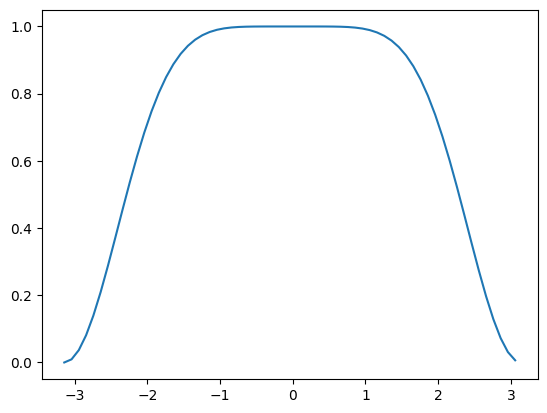

In [243]:
theta_vec_bb1 = np.arange(start=-np.pi, stop=np.pi, step=0.1)
a_vec_bb1 = [np.cos(-1/2*theta) for theta in theta_vec_bb1]

transformation = [np.square(np.abs(QSP(phi_vec_bb1, a)[0][0])) for a in a_vec_bb1]

def target(theta):
    return 1/8 * np.square(np.cos(theta/2)) * (3*np.power(np.cos(theta/2), 8) - 15*np.power(np.cos(theta/2), 6) + 35*np.power(np.cos(theta/2), 4) - 45*np.power(np.cos(theta/2), 2) + 30)

#transformation = [target(theta) for theta in theta_vec_bb1]

print(transformation)

plt.plot(theta_vec_bb1, transformation)
plt.show()